In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import string
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import confusion_matrix , log_loss , accuracy_score , classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
from sklearn.metrics import recall_score

# 1. Data Loading

In [2]:
data = pd.read_csv('Reviews.csv')

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.shape

(568454, 10)

# 2. Data Cleaning

In [5]:
data_nonulls = data.dropna()

In [6]:
data_nonulls.shape

(568411, 10)

In [7]:
data_nonulls['Time'] = pd.to_datetime(data_nonulls['Time'],unit='s')

C:\Users\91975\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
data_nonulls.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
data_nonulls.dtypes

Id                                 int64
ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
Summary                           object
Text                              object
dtype: object

C:\Users\91975\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


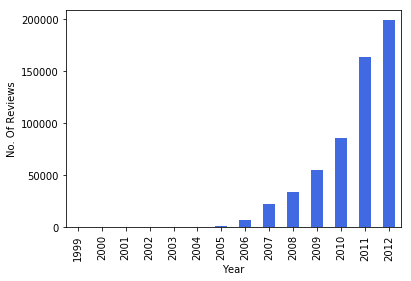

In [10]:
data_nonulls['Time'].groupby([data_nonulls["Time"].dt.year]).count().plot(kind="bar",color='royalblue')
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=1.0
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'
plt.xlabel('Year')
plt.ylabel('No. Of Reviews')
plt.rcParams.update({'font.size':15 })
plt.show()

Text(0, 0.5, 'No. Of Reviews')

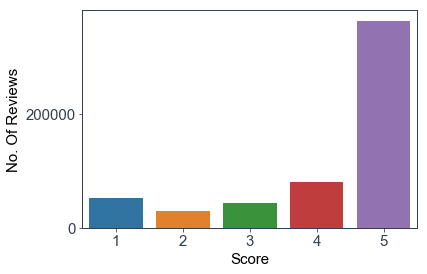

In [11]:
sns.countplot(data_nonulls.Score)
sns.set(rc={'figure.figsize':(10,10)},font='calibri', font_scale=2.5)
plt.ylabel('No. Of Reviews')

In [12]:
data_nonulls.Score[data_nonulls.Score==1]='very poor'
data_nonulls.Score[data_nonulls.Score==2]='poor'
data_nonulls.Score[data_nonulls.Score==3]='average'
data_nonulls.Score[data_nonulls.Score==4]='Good'
data_nonulls.Score[data_nonulls.Score==5]='very good'

C:\Users\91975\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\91975\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\91975\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C

Text(0.5, 0, 'Label Type')

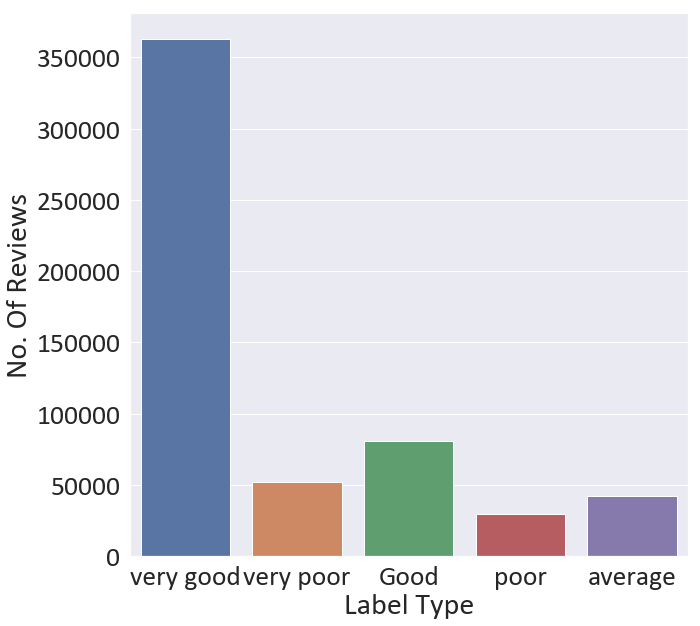

In [13]:
sns.countplot(data_nonulls.Score)
sns.set(rc={'figure.figsize':(10,10)},font='calibri', font_scale=2)
plt.ylabel('No. Of Reviews')
plt.xlabel('Label Type')

In [14]:
data_nonulls['Score_2class'] = data["Score"].apply(lambda x: 1 if x > 3 else 0)

C:\Users\91975\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
data_nonulls.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_2class
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,very good,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,very poor,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Good,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,poor,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,very good,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,1


Text(0.5, 0, 'Label Type')

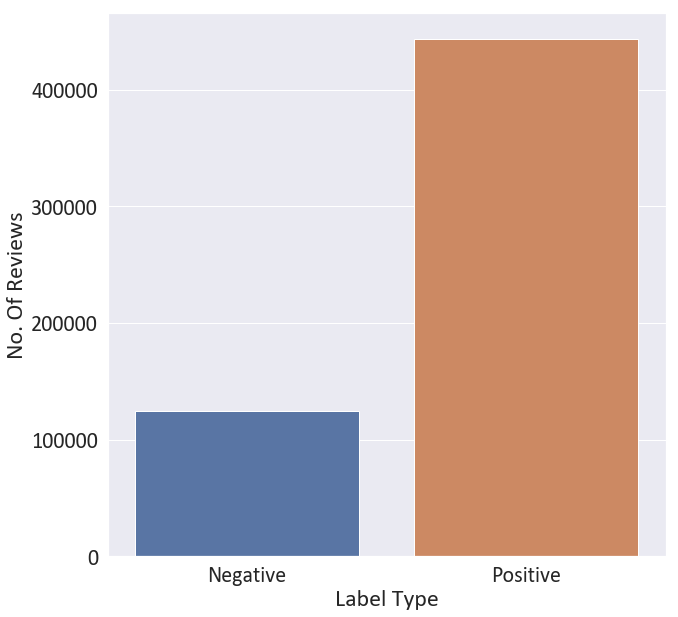

In [16]:
sns.countplot(data_nonulls.Score_2class)
sns.set(rc={'figure.figsize':(10,10)},font='calibri', font_scale=2)
plt.ylabel('No. Of Reviews')
plt.xticks([0,1],['Negative','Positive'])
plt.xlabel('Label Type')


In [17]:
data_nonulls.groupby('Score_2class')['Summary'].count()

Score_2class
0    124645
1    443766
Name: Summary, dtype: int64

# 3.Preprocessing

In [18]:
def cleaning_non_alphabet(line):
    pattern = re.compile(r'[^a-z]+')
    line = line.lower()
    line = pattern.sub(' ', line).strip()  
    return line
data_nonulls['cleaned_Text'] = data_nonulls['Text'].apply(lambda x: cleaning_non_alphabet(x))

C:\Users\91975\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [19]:
def remove_stop_words(line):
    # Tokenize
    words = word_tokenize(line)
    # stop words
    stopwords_list = set(stopwords.words('english'))
    # remove stop words
    words = [word for word in words if word not in stopwords_list]
    # Lemmatization
    ps  = nltk.WordNetLemmatizer()
    words = [ps.lemmatize(word) for word in words]
    # list to sentence
    line = ' '.join(words) 
    return line

data_nonulls['cleaned_Text'] = data_nonulls['cleaned_Text'].apply(lambda x: remove_stop_words(x))

C:\Users\91975\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Word Cloud display 

In [20]:
def plottingWordCloud(words, title):

    wordcloud = WordCloud(width = 800, 
                          height = 800, 
                          background_color ='black', 
                          min_font_size = 10,
                          max_words=250).generate(str(words)) 

    # plot the WordCloud image                        
    plt.figure(figsize = (10,10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.suptitle(title, fontsize=18)
    plt.tight_layout(pad = 5) 
    plt.show() 
    
    return

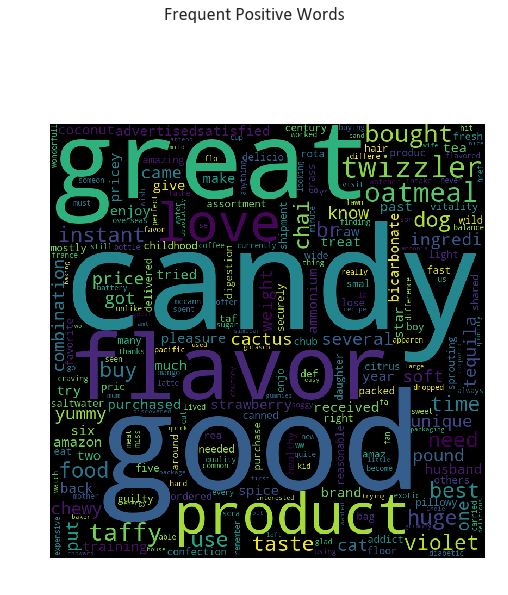

In [21]:
plottingWordCloud(data_nonulls[data_nonulls['Score_2class'] == 1]['cleaned_Text'], 'Frequent Positive Words')

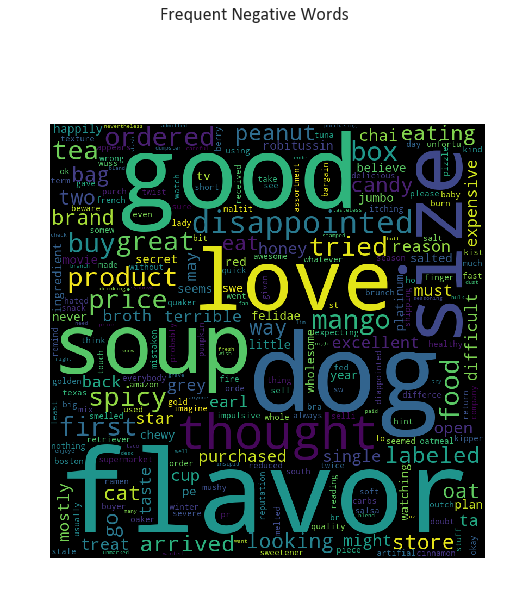

In [22]:
plottingWordCloud(data_nonulls[data_nonulls['Score_2class'] == 0]['cleaned_Text'], 'Frequent Negative Words')

# 4. Model Selection

In [23]:
X = data_nonulls['cleaned_Text']
y = data_nonulls['Score_2class']
y_5class = data_nonulls['Score']

# For 2 class

In [24]:
[X_train,X_test,y_Train,y_Test] = train_test_split(X,y,test_size=0.25, random_state=12)

In [25]:
def performanceEvaluation(model, X_train, X_test, y_train, y_test):
    
    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)

    #Log-Loss Score of the Model
    print('Train Log Loss:', log_loss(y_train, pred_y_train))
    print('Test Log Loss:', log_loss(y_test, pred_y_test))
    print('\n')
    
    # Acuuracy Score of the Model
    print('Training Accuracy:', accuracy_score(y_train, pred_y_train))
    print('Test Accuracy:', accuracy_score(y_test, pred_y_test))
    print('\n')

    #Classification report of the Model
    print('Classification Report training:\n', classification_report(y_train,pred_y_train))
    print('Classification Report test:\n', classification_report(y_test,pred_y_test))
    return

In [26]:
def metricComparison(model, X_train, X_test, y_train, Y_test):
    
    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(Y_test, pred_y_test)*100
    test_loss=metrics.log_loss(Y_test, model.predict_proba(X_test))
    Precision = metrics.precision_score(Y_test, pred_y_test,average='weighted')*100
    Recall = metrics.recall_score(Y_test, pred_y_test,average='weighted')*100
    f1_score = metrics.f1_score(Y_test, pred_y_test,average='weighted')*100
    
    return accuracy_test,test_loss,Precision,Recall,f1_score

In [27]:
#BAG OF WORDS

bow_vect = CountVectorizer()
Xtrain_bow = bow_vect.fit_transform(X_train)
Xtest_bow = bow_vect.transform(X_test)

#tfidf Vector

tfidf_vect = TfidfVectorizer()
Xtrain_tfidf = tfidf_vect.fit_transform(X_train)
Xtest_tfidf = tfidf_vect.transform(X_test)

# Logistic Regression

In [28]:
# logistic regression model for BOW
logit_bow = LogisticRegression(C=10,solver='sag')
logit_bow.fit(Xtrain_bow, y_Train)

# logistic regression model for tfidf
logit_tfidf = LogisticRegression(C=10,solver='sag')
logit_tfidf.fit(Xtrain_tfidf, y_Train)

C:\Users\91975\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

# For 5 classes

In [29]:
[X_train_5class,X_test_5class,y_Train_5class,y_Test_5class] = train_test_split(
                                                                               X,
                                                                               y_5class,
                                                                               test_size=0.25,
                                                                               random_state=12)

In [30]:
#BAG OF WORDS

bow_vect_5class = CountVectorizer()
Xtrain_bow_5class = bow_vect_5class.fit_transform(X_train_5class)
Xtest_bow_5class = bow_vect_5class.transform(X_test_5class)

#tfidf Vector

tfidf_vect_5class = TfidfVectorizer()
Xtrain_tfidf_5class = tfidf_vect_5class.fit_transform(X_train_5class)
Xtest_tfidf_5class = tfidf_vect_5class.transform(X_test_5class)

In [31]:
# logistic regression model for BOW
logit_bow_5class = LogisticRegression(C=10,solver='sag')
logit_bow_5class.fit(Xtrain_bow_5class, y_Train_5class)

# logistic regression model for tfidf
logit_tfidf_5class = LogisticRegression(C=10,solver='sag')
logit_tfidf_5class.fit(Xtrain_tfidf_5class, y_Train_5class)

C:\Users\91975\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\91975\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\91975\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\91975\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\91975\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached wh

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

# Model Performance

# Logit Model muticlass Comparison

In [33]:
#2 classes
bow = metricComparison(logit_bow, Xtrain_bow, Xtest_bow, y_Train, y_Test)
tFIDF = metricComparison(logit_tfidf, Xtrain_tfidf, Xtest_tfidf, y_Train, y_Test)

#% classes
bow_5class = metricComparison(logit_bow_5class, Xtrain_bow_5class, Xtest_bow_5class, y_Train_5class, y_Test_5class)
tFIDF_5class = metricComparison(logit_tfidf_5class, Xtrain_tfidf, Xtest_tfidf_5class, y_Train_5class, y_Test_5class)

#DF creation
data_logit = {'Model':['Logistic Regression','Logistic Regression',
                       'Logistic Regression','Logistic Regression'],
              'Vectorizer':['Bag Of Words','Bag Of Words',
                            'TF-IDF','TF-IDF'],
              'No. of Classes':['2','5','2','5',],
        'Accuracy':[bow[0],bow_5class[0],tFIDF[0],tFIDF_5class[0]],
        'log loss':[bow[1],bow_5class[1],tFIDF[1],tFIDF_5class[1]],
        'Precision':[bow[2],bow_5class[2],tFIDF[2],tFIDF_5class[2]],
        'Recall':[bow[3],bow_5class[3],tFIDF[3],tFIDF_5class[3]],
        'F1-Score':[bow[4],bow_5class[4],tFIDF[4],tFIDF_5class[4]]
             }

performance_logit = pd.DataFrame(
                        data_logit,
                        columns=['Model','Vectorizer','No. of Classes','Accuracy'
                                 ,'log loss','Precision','Recall','F1-Score'])

In [34]:
performance_logit.to_csv('multiclass_Comaprison.csv')

In [35]:
performance_logit

,Model,Vectorizer,No. of Classes,Accuracy,log loss,Precision,Recall,F1-Score
0,Logistic Regression,Bag Of Words,2,88.763784,0.283195,88.328695,88.763784,88.233603
1,Logistic Regression,Bag Of Words,5,73.005496,0.777761,68.539622,73.005496,68.479801
2,Logistic Regression,TF-IDF,2,90.326031,0.243076,90.039996,90.326031,90.083133
3,Logistic Regression,TF-IDF,5,75.933654,0.690662,73.038650,75.933654,73.314847


# Logistic Multiple Gram comparison

In [79]:
#Unigram
start_uni = time.time()
tfidf_unigram = TfidfVectorizer(ngram_range=(1,1))
Xtrain_unigrams = tfidf_unigram.fit_transform(X_train)
Xtest_unigrams = tfidf_unigram.transform(X_test)

logit_unigrams = LogisticRegression(C=10,solver='sag')
logit_unigrams.fit(Xtrain_unigrams, y_Train)
elapsed_time_uni = (time.time() - start_uni) 
#bigram
start_bi = time.time()
tfidf_bigrams = TfidfVectorizer(ngram_range=(1,2))
Xtrain_bigrams = tfidf_bigrams.fit_transform(X_train)
Xtest_bigrams = tfidf_bigrams.transform(X_test)

logit_bigrams = LogisticRegression(C=10,solver='sag')
logit_bigrams.fit(Xtrain_bigrams, y_Train)
elapsed_time_bi = (time.time() - start_bi) 
#trigram
start_tri = time.time()
tfidf_trigrams = TfidfVectorizer(ngram_range=(1,3))
Xtrain_trigrams = tfidf_trigrams.fit_transform(X_train)
Xtest_trigrams = tfidf_trigrams.transform(X_test)

logit_trigrams = LogisticRegression(C=10,solver='sag')
logit_trigrams.fit(Xtrain_trigrams, y_Train)
elapsed_time_tri = (time.time() - start_tri) 

In [86]:
print(elapsed_time_uni,elapsed_time_bi,elapsed_time_tri)

90.29284286499023 193.42768383026123 336.8797073364258


In [37]:
def metricComparison1(model, X_train, X_test, y_train, Y_test):
    
    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, pred_y_train)*100
    accuracy_test = metrics.accuracy_score(Y_test, pred_y_test)*100
    train_loss = metrics.log_loss(y_train, pred_y_train)
    test_loss=metrics.log_loss(Y_test, model.predict_proba(X_test))
    Precision = metrics.precision_score(Y_test, pred_y_test)*100
    Recall = metrics.recall_score(Y_test, pred_y_test)*100
    f1_score = metrics.f1_score(Y_test, pred_y_test)*100
    
    return accuracy_train,accuracy_test,train_loss,test_loss,Precision,Recall,f1_score

In [38]:
uni = metricComparison1(logit_unigrams, Xtrain_unigrams, Xtest_unigrams, y_Train, y_Test)
bi=metricComparison1(logit_bigrams, Xtrain_bigrams, Xtest_bigrams, y_Train, y_Test)
tri = metricComparison1(logit_trigrams, Xtrain_trigrams, Xtest_trigrams, y_Train, y_Test)
data_logit = {'Model':['Unigram','Bigram','Trigram'],'Vectorizer':['TF-IDF','TF-IDF','TF-IDF'],
        'Accuracy':[uni[1],bi[1],tri[1]],
        'log-loss':[uni[3],bi[3],tri[3]],
        'Precision':[uni[4],bi[4],tri[4]],'Recall':[uni[5],bi[5],tri[5]],'F1-Score':[uni[6],bi[6],tri[6]]}
performance_grams = pd.DataFrame(data_logit,columns=['Model','Vectorizer','Accuracy',
        'log-loss','Precision','Recall','F1-Score'])

In [39]:
performance_grams

,Model,Vectorizer,Accuracy,log-loss,Precision,Recall,F1-Score
0,Unigram,TF-IDF,90.326031,0.243076,92.294233,95.586830,93.911680
1,Bigram,TF-IDF,93.760160,0.168647,94.827238,97.314232,96.054640
2,Trigram,TF-IDF,93.803086,0.171585,94.961076,97.219568,96.077051


In [73]:
performance_grams.to_csv('N-gram_Comaprison.csv')

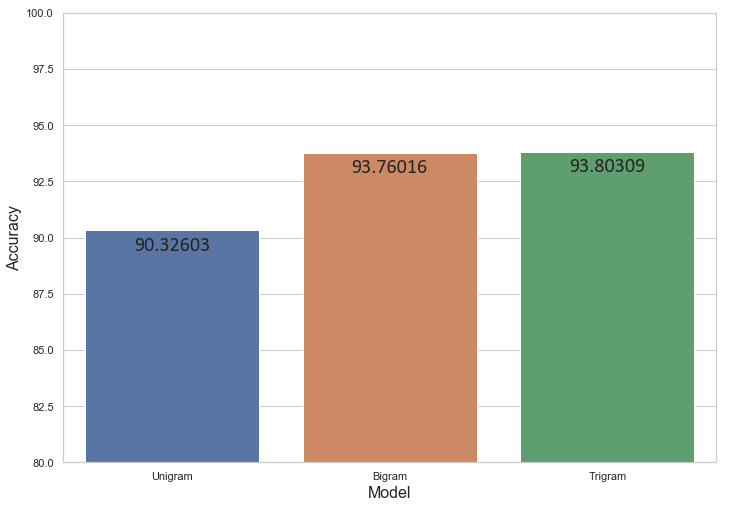

In [78]:
sns.set(style="whitegrid")
plt.ylim(80,100)
sns.set(rc={'figure.figsize':(11.7,8.27)},font='calibri', font_scale=1.5)
plot = sns.barplot(x=performance_grams["Model"], y=performance_grams["Accuracy"],data=performance_grams,capsize=.2)
# plot.set_title('Logistic Regression n-gram Model Comparison')
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.5f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=20,
                   xytext = (0, -15), 
                   textcoords = 'offset points')

# Confusion Matrix

In [41]:
def plotConfusionMatrix(model, X_train, X_test, y_train, y_test):
    
    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)

    # confusion matrix
    fig, axs = plt.subplots(1,2,figsize=[17,7])
    axs = axs.flatten()
    
    axs[0].title.set_text('Training data')
    axs[1].title.set_text('Test data')
    
    fig.text(0.26, 0.01, 'Predicted label', ha='center', size=14)
    fig.text(0.69, 0.01, 'Predicted label', ha='center', size=14)
    fig.text(0.08, 0.5, 'True label', va='center', rotation='vertical', size=14)
    fig.text(0.5, 0.5, 'True label', va='center', rotation='vertical', size=14)
    
    sns.heatmap(confusion_matrix(y_train,pred_y_train),
                    annot=True,
                    cmap='YlGnBu',
                    xticklabels=['negative', 'positive'],
                    yticklabels=['negative', 'positive'],
                    fmt="d",
                    ax=axs[0])
    
    sns.heatmap(confusion_matrix(y_test,pred_y_test),
                    annot=True,
                    cmap='YlGnBu',
                    xticklabels=['negative', 'positive'],
                    yticklabels=['negative', 'positive'],
                    fmt="d",
                    ax=axs[1])
    plt.show()
    
    return

                                          Bow Confusion Matrix


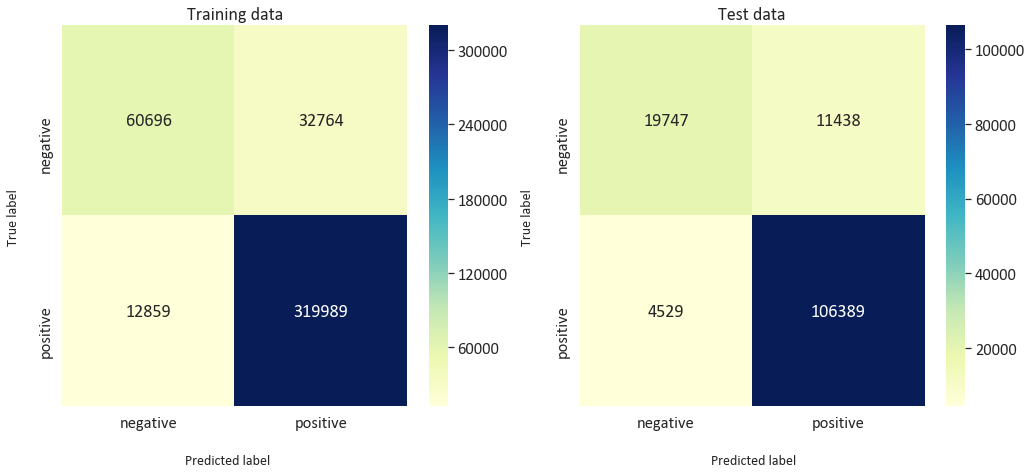

In [42]:
print('                                          Bow Confusion Matrix')
plotConfusionMatrix(logit_bow, Xtrain_bow, Xtest_bow, y_Train, y_Test)

                                          TfIDF Confusion Matrix


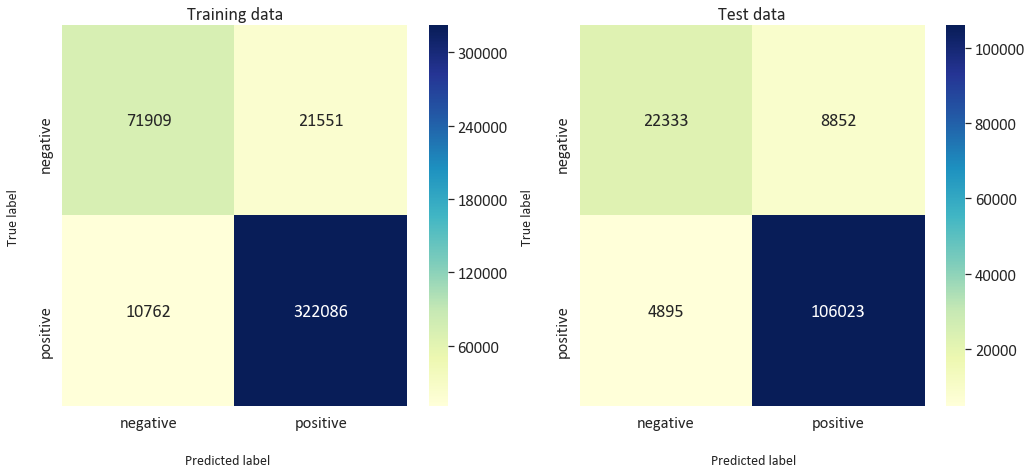

In [43]:
print('                                          TfIDF Confusion Matrix')
plotConfusionMatrix(logit_tfidf, Xtrain_tfidf, Xtest_tfidf, y_Train, y_Test)

# Decision Tree and Random Forest trained on Bigram

In [44]:
decisonTree = DecisionTreeClassifier(random_state=20160121)
decisonTree.fit(Xtrain_bigrams, y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=20160121, splitter='best')

In [45]:
randomForest = RandomForestClassifier(random_state=20160121)
randomForest.fit(Xtrain_bigrams, y_Train)

C:\Users\91975\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=20160121, verbose=0,
            warm_start=False)

                                          Decision Tree Confusion Matrix


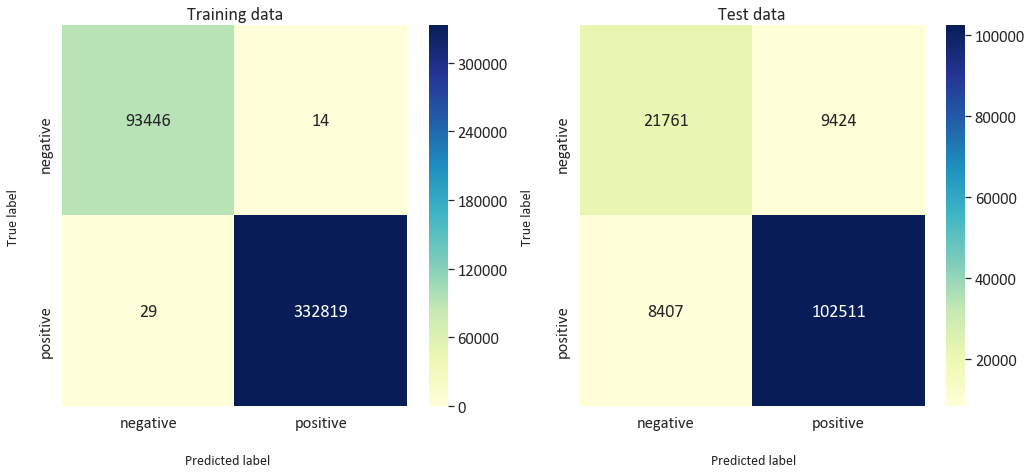

In [47]:
print('                                          Decision Tree Confusion Matrix')
plotConfusionMatrix(decisonTree,Xtrain_bigrams, Xtest_bigrams, y_Train, y_Test)

                                          Random Forest Confusion Matrix


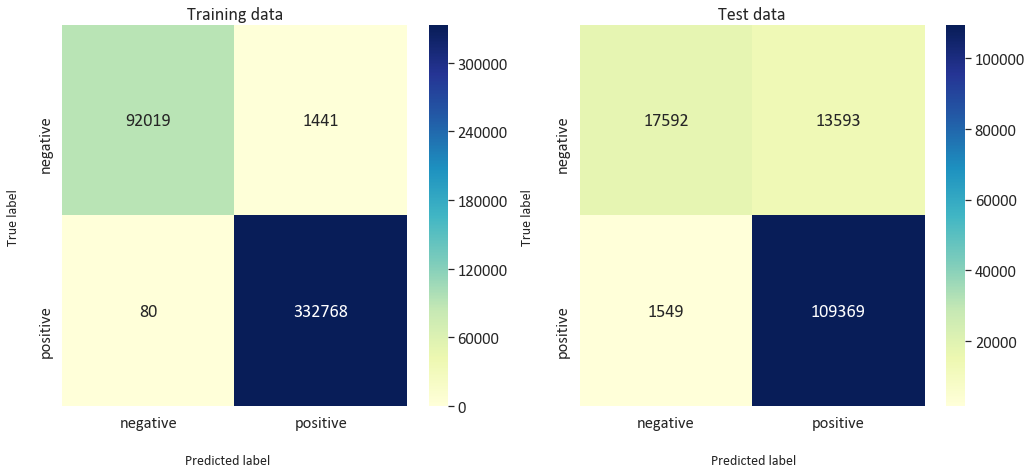

In [48]:
print('                                          Random Forest Confusion Matrix')
plotConfusionMatrix(randomForest,Xtrain_bigrams, Xtest_bigrams, y_Train, y_Test)

# Tree Display

In [49]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(decisonTree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())
# graph.write_pdf('tree.pdf')

# Linear vs Non-Linear Model Comparison

In [71]:
#metric data for logistic regression
logit = metricComparison1(logit_bigrams, Xtrain_bigrams, Xtest_bigrams, y_Train, y_Test)

#metric data for decison tree regression
dT    = metricComparison1(decisonTree,Xtrain_bigrams, Xtest_bigrams, y_Train, y_Test)

#metric data for random forest regression
rD    = metricComparison1(randomForest,Xtrain_bigrams, Xtest_bigrams, y_Train, y_Test)


data = {'Model':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier'],
        'Vectorizer':['Bigram(TF-IDF)','Bigram(TF-IDF)','Bigram(TF-IDF)'],
        'Accuracy':[logit[1],dT[1],rD[1]],
        'log-loss':[logit[3],dT[3],rD[3]],
        'Precision':[logit[4],dT[4],rD[4]],'Recall':[logit[5],dT[5],rD[5]],'F1-Score':[logit[6],dT[6],rD[6]]}

# Dataframe creation
performance_df = pd.DataFrame(data,columns=['Model','Vectorizer','Accuracy',
        'log-loss','Precision','Recall','F1-Score'])

In [72]:
performance_df

,Model,Vectorizer,Accuracy,log-loss,Precision,Recall,F1-Score
0,Logistic Regression,Bigram(TF-IDF),93.760160,0.168647,94.827238,97.314232,96.054640
1,Decision Tree Classifier,Bigram(TF-IDF),87.452059,4.332041,91.580828,92.420527,91.998762
2,Random Forest Classifier,Bigram(TF-IDF),89.344349,0.487324,88.945365,98.603473,93.525740


In [74]:
performance_df.to_csv('All_model_Comaprison.csv')

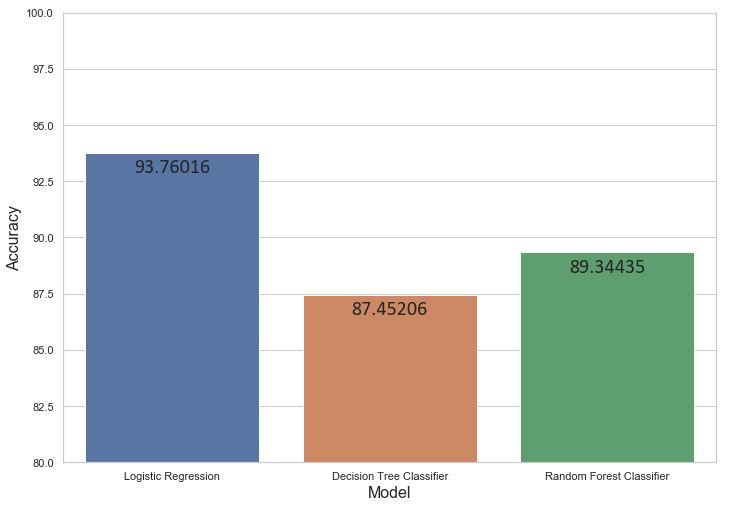

In [80]:
sns.set(style="whitegrid")
plt.ylim(80,100)
sns.set(rc={'figure.figsize':(11.7,8.27)},font='calibri', font_scale=1.5)
plot = sns.barplot(x=performance_df["Model"], y=performance_df["Accuracy"],data=performance_df,capsize=.2)
plot.set_title('Logistic Regression n-gram Model Comparison')
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.5f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=20,
                   xytext = (0, -15), 
                   textcoords = 'offset points')

# ROC Curve PLOT

In [76]:
pred_bow = logit_bow.predict_proba(Xtest_bow)
fpr_bow, tpr_bow, threshold1 = metrics.roc_curve(y_Test, pred_bow[:,1])

pred_logit = logit_tfidf.predict_proba(Xtest_tfidf)
fpr_logit, tpr_logit, threshold1 = metrics.roc_curve(y_Test, pred_logit[:,1])

pred_unigram = logit_unigrams.predict_proba(Xtest_unigrams)
fpr_unigram, tpr_unigram, threshold1 = metrics.roc_curve(y_Test, pred_unigram[:,1])

pred_bigram = logit_bigrams.predict_proba(Xtest_bigrams)
fpr_bigram, tpr_bigram, threshold1 = metrics.roc_curve(y_Test, pred_bigram[:,1])

pred_trigram = logit_trigrams.predict_proba(Xtest_trigrams)
fpr_trigram, tpr_trigram, threshold1 = metrics.roc_curve(y_Test, pred_trigram[:,1])

pred_dT = decisonTree.predict_proba(Xtest_bigrams)
fpr_dT, tpr_dT, threshold1 = metrics.roc_curve(y_Test, pred_dT[:,1])

pred_rD = randomForest.predict_proba(Xtest_bigrams)
fpr_rD, tpr_rD, threshold1 = metrics.roc_curve(y_Test, pred_rD[:,1])

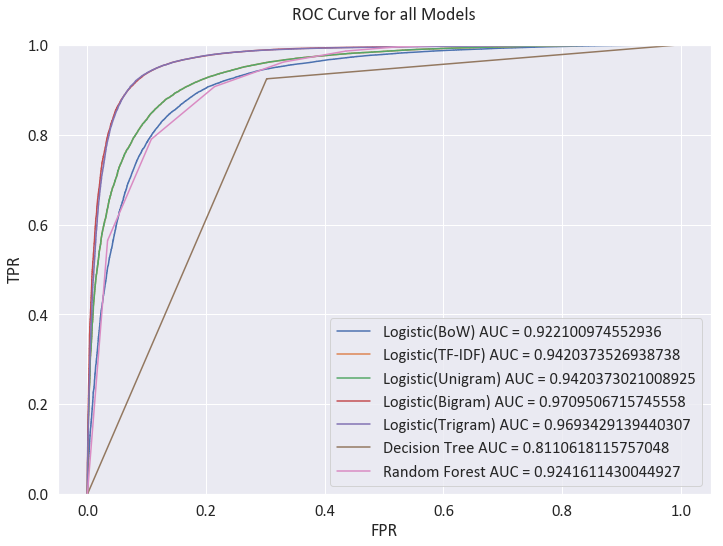

In [77]:
plt.plot(fpr_bow,tpr_bow, label = 'Logistic(BoW) AUC = ' + str(metrics.auc(fpr_bow,tpr_bow)))
plt.plot(fpr_logit,tpr_logit, label = 'Logistic(TF-IDF) AUC = ' + str(metrics.auc(fpr_logit,tpr_logit)))
plt.plot(fpr_unigram, tpr_unigram, label = 'Logistic(Unigram) AUC = ' + str(metrics.auc(fpr_unigram, tpr_unigram)))
plt.plot(fpr_bigram,tpr_bigram, label = 'Logistic(Bigram) AUC = ' + str(metrics.auc(fpr_bigram,tpr_bigram)))
plt.plot(fpr_trigram,tpr_trigram, label = 'Logistic(Trigram) AUC = ' + str(metrics.auc(fpr_trigram,tpr_trigram)))
plt.plot(fpr_dT, tpr_dT, label = 'Decision Tree AUC = ' + str(metrics.auc(fpr_dT, tpr_dT)))
plt.plot(fpr_rD,tpr_rD, label = "Random Forest AUC = "+ str(metrics.auc(fpr_rD,tpr_rD)))


plt.ylim(0,1)
plt.legend(loc='best')
plt.grid(True)
plt.title("ROC Curve for all Models\n")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()